In [85]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from math import exp
from numpy.linalg import inv, eig

In [2]:
img = Image.open('image.jpg').convert('L') 
img_ndarray = np.asarray(img)


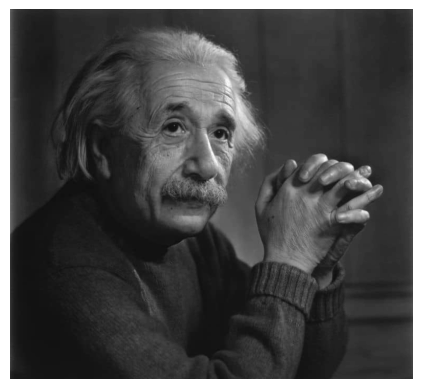

In [ ]:
plt.imshow(img,cmap="gray")
plt.axis("off")
plt.show()

In [9]:
img_ndarray.shape

(706, 768)

In [46]:
def padding(img,filter_size):
    
    pad = (((filter_size)-1)//2)   #Calculating the padding needed from the filter size

    (ih,iw) = (img.shape)    #Store the image size for the loop
    (nh,nw) = (ih+(pad*2),iw+(pad*2))   #Image size after padding would be original_image_size + 2*padding - since padding is done on both the sides.
    
    p = np.zeros((nh, nw))  #Result array to store 0 values. Original image will be pasted on this.
    for i in range(0,ih):   #Loop for height
        for j in range(0,iw):   #Loop for width
            p[i+pad][j+pad]=img[i][j]  #Padded Image.
    return p
    

In [47]:
def conv(filter_matrix,img_ndarray):
    filter_size = filter_matrix.shape[0]  
    pad = ((filter_size)-1)//2  #Calculating the padding 
    padded_img = padding(img_ndarray,filter_size)  #performing the padding
    conv_img = np.zeros(img_ndarray.shape)    #array of zeros of size of original image
    for i in range(pad,padded_img.shape[0]-pad):  #Loop for height
        for j in range(pad,padded_img.shape[1]-pad):  #Loop for width
            g = padded_img[i-pad:i+pad+1,j-pad:j+pad+1]  # Extracting the Region to be convoluted by filter
            h = np.sum(filter_matrix * g)  #Performing convolution
            conv_img[i-pad][j-pad] = h   #adding the pixel value to the result image

    return conv_img   #returning the result image.

In [48]:
def gaussian_fn (x, y, sigma):
    #function to calculate the gaussian function
    sq = pow(sigma,2)
    n = (1/(2* (np.pi) * sq))
    num = (pow(x,2) + pow(y,2) )
    den = 2 * sq
    f = num/den
    e = exp(-f)
    return n*e

In [49]:
def g_filter(sigma, size_of_filter = 5):
    g_filter = np.zeros((size_of_filter, size_of_filter))  # Initialize a square filter with zeros
    for i in range(size_of_filter):  
        for j in range(size_of_filter):
            g_filter[i, j] = gaussian_fn(i - size_of_filter // 2, j - size_of_filter // 2, sigma)  # (x,y) would be the distance from the center of the filter
    sum = np.sum(g_filter)  #for normalization
    return g_filter/(sum)

In [50]:
def gaussian_smoothing (sigma, img_ndarray):
    f = g_filter(sigma)    #getting the gaussian filter
    return conv(f,img_ndarray)  #performing convolution

In [51]:
no_img_in_octave = 5
sigma 



1.6

In [59]:
def generate_octave(no_img_in_octave, sigma,init_level=img_ndarray):
    octave = []
    octave.append(init_level)  # Start with the initial level of the octave
    
    k = 2 ** (1 / no_img_in_octave)  # The scale factor
    
    # Generate the octave by applying the Gaussian filter (no_img_in_octave + 2) times
    for i in range(no_img_in_octave + 2):
        current_sigma = sigma * (k**i)  # Adjust sigma for the current image
        prev = octave[-1]  # Get the previous image in the octave
        blurred_image = gaussian_smoothing( sigma=current_sigma, img_ndarray=prev)  # Apply Gaussian smoothing
        
        octave.append(blurred_image)  # Append the blurred image to the octave
    
    return octave

In [ ]:
sigma = 1.6  # Initial sigma for the first image
no_img_in_octave = 5  # Number of images in each octave
octave = generate_octave(no_img_in_octave, sigma)

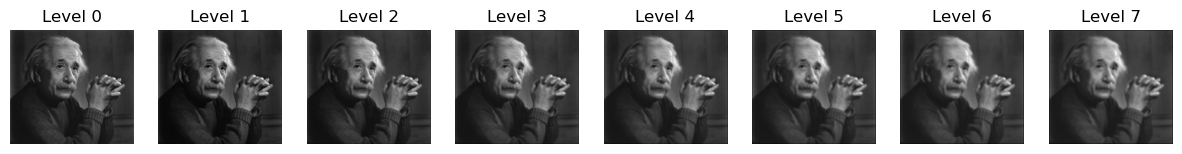

In [61]:
fig, axes = plt.subplots(1, len(octave), figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(octave[i], cmap='gray')
    ax.set_title(f'Level {i}')
    ax.axis('off')

plt.show()

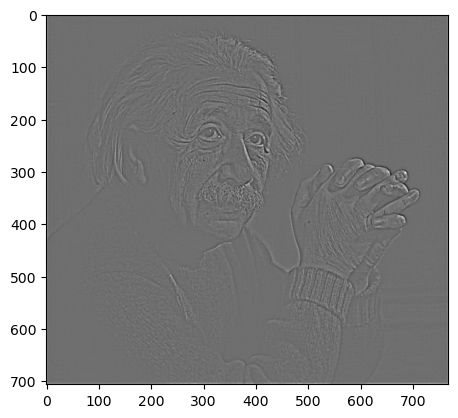

In [63]:
ch = octave[0]-octave[3]
plt.imshow(ch,cmap="gray")



In [163]:
image = Image.open("image.jpg").convert("L")
img_ndarray = np.asarray(image)

# q1

In [87]:
def gaussian_fn(x, y, sigma):
    """Calculate the 2D Gaussian function."""
    sq = pow(sigma, 2)
    n = 1 / (2 * np.pi * sq)
    num = (pow(x, 2) + pow(y, 2))
    den = 2 * sq
    return n * np.exp(-num / den)

def g_filter(sigma, size_of_filter=3):
    """Generate a Gaussian filter."""
    g_filter = np.zeros((size_of_filter, size_of_filter))
    for i in range(size_of_filter):
        for j in range(size_of_filter):
            g_filter[i, j] = gaussian_fn(i - size_of_filter // 2, j - size_of_filter // 2, sigma)
    return g_filter / np.sum(g_filter)

def conv(filter_matrix, img_ndarray):
    """Convolution function."""
    filter_size = filter_matrix.shape[0]
    pad = (filter_size - 1) // 2
    padded_img = np.pad(img_ndarray, ((pad, pad), (pad, pad)), mode='constant', constant_values=0)
    conv_img = np.zeros(img_ndarray.shape)
    
    for i in range(pad, padded_img.shape[0] - pad):
        for j in range(pad, padded_img.shape[1] - pad):
            region = padded_img[i - pad:i + pad + 1, j - pad:j + pad + 1]
            conv_img[i - pad, j - pad] = np.sum(region * filter_matrix)
    
    return conv_img

def gaussian_smoothing(sigma, img_ndarray, size=3):
    """Apply Gaussian smoothing to the image."""
    g = g_filter(sigma, size)
    return conv(g, img_ndarray)

In [89]:
# Generate Octave with no_img_in_octave nu,ber of images in it
def generate_octave(no_img_in_octave, sigma, init_level = img_ndarray):
    octave = [init_level]  # Start with the initial level of the octave
    k = 2 ** (1 / no_img_in_octave)  # The scale factor
    
    for i in range(no_img_in_octave + 2):
        sigma_k = (k ** i) * sigma
        prev = octave[-1]
        octave.append(gaussian_smoothing(sigma_k, prev))  # Apply smoothing to the image
    
    return octave

In [ ]:
# Generate DoG Octave
def generate_DoG_octave(gaussian_octave):
    octave = []
    for i in range(1, len(gaussian_octave)):
        octave.append(gaussian_octave[i] - gaussian_octave[i - 1])  # DoG = Gaussian difference
    return np.stack(octave, axis=-1)


In [143]:
def generate_DoG_pyramid(gaussian_pyramid):
    pyr = []
    for gaussian_octave in gaussian_pyramid:
        dog_octave = generate_DoG_octave(gaussian_octave)
        pyr.append(dog_octave)
    return pyr


In [144]:
def get_candidate_keypoints(D, w=16):
    candidates = []
    D[:, :, 0] = 0
    D[:, :, -1] = 0
    for i in range(w // 2 + 1, D.shape[0] - w // 2 - 1):
        for j in range(w // 2 + 1, D.shape[1] - w // 2 - 1):
            for k in range(1, D.shape[2] - 1):
                patch = D[i - 1:i + 2, j - 1:j + 2, k - 1:k + 2]
                if np.argmax(patch) == 13 or np.argmin(patch) == 13:
                    candidates.append([i, j, k])
    return candidates


In [110]:
# Localize keypoints using Jacobian and Hessian
def localize_keypoint(D, x, y, s):

    # computing first derivative
    dx = (D[y, x + 1, s] - D[y, x - 1, s]) / 2.
    dy = (D[y + 1, x, s] - D[y - 1, x, s]) / 2.
    ds = (D[y, x, s + 1] - D[y, x, s - 1]) / 2.
    
    # computing second derivative
    dxx = D[y, x + 1, s] - 2 * D[y, x, s] + D[y, x - 1, s]
    dxy = ((D[y + 1, x + 1, s] - D[y + 1, x - 1, s]) - (D[y - 1, x + 1, s] - D[y - 1, x - 1, s])) / 4.
    dxs = ((D[y, x + 1, s + 1] - D[y, x - 1, s + 1]) - (D[y, x + 1, s - 1] - D[y, x - 1, s - 1])) / 4.
    
    dyy = D[y + 1, x, s] - 2 * D[y, x, s] + D[y - 1, x, s]
    dys = ((D[y + 1, x, s + 1] - D[y - 1, x, s + 1]) - (D[y + 1, x, s - 1] - D[y - 1, x, s - 1])) / 4.
    
    dss = D[y, x, s + 1] - 2 * D[y, x, s] + D[y, x, s - 1]
    
    J = np.array([dx, dy, ds])   # Jacobian matrix 
    H = np.array([[dxx, dxy, dxs], [dxy, dyy, dys], [dxs, dys, dss]])  # Hessian Matrix
    offset = -inv(H).dot(J)  
    
    return offset, J, H[:2, :2], x, y, s

In [111]:
def compute_descriptor(keypoint, gaussian_image, bin_size=4, num_bins=8):
    """
    Compute a descriptor for a given keypoint.
    :param keypoint: [x, y, scale], the location of the keypoint.
    :param gaussian_image: The Gaussian image corresponding to the keypoint's scale.
    :param bin_size: Size of the region for the descriptor (e.g., 4x4).
    :param num_bins: Number of orientation bins (e.g., 8 for SIFT).
    :return: A 128-dimensional descriptor vector.
    """
    x, y, scale = keypoint
    patch_radius = bin_size * 2
    descriptor = []
    
    for i in range(-patch_radius, patch_radius, bin_size):
        for j in range(-patch_radius, patch_radius, bin_size):
            # Extract patch region
            subregion = gaussian_image[
                int(y + i):int(y + i + bin_size),
                int(x + j):int(x + j + bin_size)
            ]
            # Calculate gradient magnitudes and orientations
            gy, gx = np.gradient(subregion)
            magnitude = np.sqrt(gx**2 + gy**2)
            orientation = (np.arctan2(gy, gx) * 180 / np.pi) % 360
            
            # Create histogram for this subregion
            hist, _ = np.histogram(
                orientation,
                bins=num_bins,
                range=(0, 360),
                weights=magnitude
            )
            descriptor.extend(hist)
    
    # Normalize the descriptor
    descriptor = np.array(descriptor)
    descriptor = descriptor / np.linalg.norm(descriptor)
    return descriptor


In [114]:
def find_keypoints_for_DoG_octave(D, R_th, t_c, w, gaussian_images):
    candidates = get_candidate_keypoints(D, w)
    keypoints = []
    descriptors = []  # To store descriptors
    
    for i, cand in enumerate(candidates):
        y, x, s = cand[0], cand[1], cand[2]
        offset, J, H, x, y, s = localize_keypoint(D, x, y, s)
        contrast = D[y, x, s] + 0.5 * J.dot(offset)
        if abs(contrast) < t_c:
            continue
        w, v = eig(H)
        r = w[1] / w[0]
        R = (r + 1) ** 2 / r
        if R > R_th:
            continue
        
        kp = np.array([x, y, s]) + offset
        keypoints.append(kp)
        
        # Compute descriptor for the keypoint
        scale_index = int(round(s))  # Map scale to Gaussian image
        descriptor = compute_descriptor(kp, gaussian_images[scale_index])
        descriptors.append(descriptor)
    
    return np.array(keypoints), np.array(descriptors)


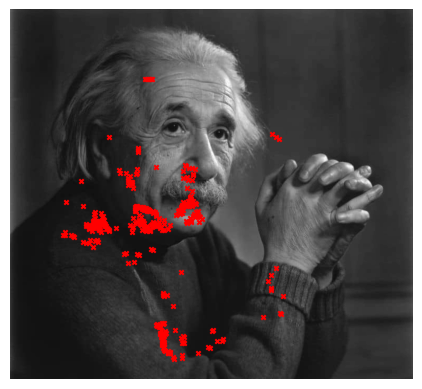

In [ ]:
# Visualization
def visualize_keypoints_on_image(original_image, keypoints):
    """Visualize keypoints on the image."""
    plt.imshow(original_image, cmap='gray')
    plt.axis('off')
    x_coords = keypoints[:, 1]
    y_coords = keypoints[:, 0]
    plt.scatter(x_coords, y_coords, c='red', s=10, marker='x')
    plt.show()
  

# Parameters
sigma_initial = 1.6 
no_img_in_octave = 5
R_th = 175
t_c = 6
w = 200

octave = generate_octave(no_img_in_octave, sigma_initial, img_ndarray)
DoG_octave = generate_DoG_octave(octave)

keypoints, descriptors = find_keypoints_for_DoG_octave(DoG_octave, R_th, t_c, w, octave)
visualize_keypoints_on_image(img, keypoints)



# Bag Of Words

In [136]:
from sklearn.cluster import KMeans

# sift

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv, eig
from scipy.ndimage import gaussian_filter
from skimage.color import rgb2gray 

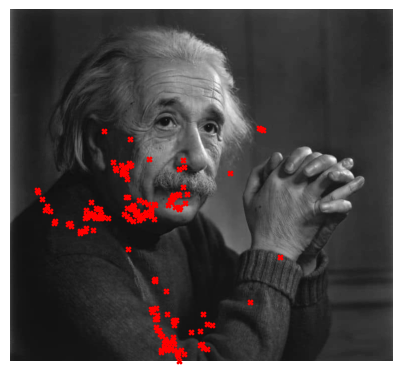

In [ ]:
 

def padding(img, filter_size):
    pad = (filter_size - 1) // 2
    ih, iw = img.shape
    nh, nw = ih + (pad * 2), iw + (pad * 2)
    p = np.zeros((nh, nw))
    for i in range(ih):
        for j in range(iw):
            p[i + pad, j + pad] = img[i, j]
    return p


def conv(filter_matrix, img_ndarray):
    filter_size = filter_matrix.shape[0]
    pad = (filter_size - 1) // 2
    padded_img = padding(img_ndarray, filter_size)
    conv_img = np.zeros(img_ndarray.shape)
    for i in range(pad, padded_img.shape[0] - pad):
        for j in range(pad, padded_img.shape[1] - pad):
            g = padded_img[i - pad:i + pad + 1, j - pad:j + pad + 1]
            h = np.sum(filter_matrix * g)
            conv_img[i - pad, j - pad] = h
    return conv_img


def gaussian_fn(x, y, sigma):
    sq = pow(sigma, 2)
    n = 1 / (2 * np.pi * sq)
    num = pow(x, 2) + pow(y, 2)
    den = 2 * sq
    f = num / den
    e = np.exp(-f)
    return n * e


def g_filter(sigma, size_of_filter=5):
    g_filter = np.zeros((size_of_filter, size_of_filter))
    for i in range(size_of_filter):
        for j in range(size_of_filter):
            g_filter[i, j] = gaussian_fn(i - size_of_filter // 2, j - size_of_filter // 2, sigma)
    return g_filter / np.sum(g_filter)


def gaussian_smoothing(sigma, img_ndarray):
    g_filter_matrix = g_filter(sigma)
    return conv(g_filter_matrix, img_ndarray)


def generate_octave(no_img_in_octave, sigma, init_level):
    octave = [init_level]
    k = 2 ** (1 / no_img_in_octave)  
    for i in range(no_img_in_octave + 2):
        current_sigma = sigma * (k**i)
        prev = octave[-1]
        blurred_image = gaussian_smoothing(current_sigma, prev)
        octave.append(blurred_image)
    return octave


def generate_DoG_octave(gaussian_octave):
    octave = []
    for i in range(1, len(gaussian_octave)):
        octave.append(gaussian_octave[i] - gaussian_octave[i - 1])
    return np.stack(octave, axis=2)


def generate_DoG_pyramid(gaussian_pyramid):
    pyr = []
    for gaussian_octave in gaussian_pyramid:
        pyr.append(generate_DoG_octave(gaussian_octave))
    return pyr

def get_candidate_keypoints(D, w=16):   
    candidates = []
    D[:, :, 0] = 0
    D[:, :, -1] = 0
    for i in range(w // 2 + 1, D.shape[0] - w // 2 - 1):
        for j in range(w // 2 + 1, D.shape[1] - w // 2 - 1):
            for k in range(1, D.shape[2] - 1):
                patch = D[i - 1:i + 2, j - 1:j + 2, k - 1:k + 2]
                if np.argmax(patch) == 13 or np.argmin(patch) == 13:
                    candidates.append([i, j, k])
    return candidates


def localize_keypoint(D, x, y, s):
    dx = (D[y, x + 1, s] - D[y, x - 1, s]) / 2
    dy = (D[y + 1, x, s] - D[y - 1, x, s]) / 2
    ds = (D[y, x, s + 1] - D[y, x, s - 1]) / 2
    dxx = D[y, x + 1, s] - 2 * D[y, x, s] + D[y, x - 1, s]
    dxy = ((D[y + 1, x + 1, s] - D[y + 1, x - 1, s]) - (D[y - 1, x + 1, s] - D[y - 1, x - 1, s])) / 4
    dxs = ((D[y, x + 1, s + 1] - D[y, x - 1, s + 1]) - (D[y, x + 1, s - 1] - D[y, x - 1, s - 1])) / 4
    dyy = D[y + 1, x, s] - 2 * D[y, x, s] + D[y - 1, x, s]
    dys = ((D[y + 1, x, s + 1] - D[y - 1, x, s + 1]) - (D[y + 1, x, s - 1] - D[y - 1, x, s - 1])) / 4
    dss = D[y, x, s + 1] - 2 * D[y, x, s] + D[y, x, s - 1]
    J = np.array([dx, dy, ds])
    H = np.array([[dxx, dxy, dxs], [dxy, dyy, dys], [dxs, dys, dss]])
    offset = -inv(H).dot(J)
    return offset, J, H[:2, :2], x, y, s


def compute_descriptor(keypoint, gaussian_image, bin_size=4, num_bins=8):
    x, y, scale = keypoint
    patch_radius = bin_size * 2
    descriptor = []
    for i in range(-patch_radius, patch_radius, bin_size):
        for j in range(-patch_radius, patch_radius, bin_size):
            subregion = gaussian_image[int(y + i):int(y + i + bin_size), int(x + j):int(x + j + bin_size)]
            gy, gx = np.gradient(subregion)
            magnitude = np.sqrt(gx**2 + gy**2)
            orientation = (np.arctan2(gy, gx) * 180 / np.pi) % 360
            hist, _ = np.histogram(orientation, bins=num_bins, range=(0, 360), weights=magnitude)
            descriptor.extend(hist)
    descriptor = np.array(descriptor)
    descriptor = descriptor / np.linalg.norm(descriptor)
    return descriptor


def find_keypoints_for_DoG_octave(D, R_th, t_c, w, gaussian_images):
    candidates = get_candidate_keypoints(D, w)
    keypoints = []
    descriptors = []
    for i, cand in enumerate(candidates):
        y, x, s = cand[0], cand[1], cand[2]
        offset, J, H, x, y, s = localize_keypoint(D, x, y, s)
        contrast = D[y, x, s] + 0.5 * J.dot(offset)
        if abs(contrast) < t_c:
            continue
        w, v = eig(H)
        r = w[1] / w[0]
        R = (r + 1) ** 2 / r
        if R > R_th:
            continue
        kp = np.array([x, y, s]) + offset
        keypoints.append(kp)
        scale_index = int(round(s))
        descriptor = compute_descriptor(kp, gaussian_images[scale_index])
        descriptors.append(descriptor)
    return np.array(keypoints), np.array(descriptors)


def visualize_keypoints_on_image(original_image, keypoints):
    plt.imshow(original_image, cmap='gray')
    plt.axis('off')
    x_coords = keypoints[:, 1]
    y_coords = keypoints[:, 0]
    plt.scatter(x_coords, y_coords, c='red', s=10, marker='x')
    plt.show()


def sift(img_ndarray):
    
    num_octaves = 3
    no_img_in_octave = 3
    sigma_initial = 1.6
    R_th = 10
    t_c = 0.03
    w = 16
    
    gaussian_pyramid = []
    for i in range(num_octaves):
        octave = generate_octave(no_img_in_octave, sigma_initial, img_ndarray)
        gaussian_pyramid.append(octave)

    dog_pyramid = generate_DoG_pyramid(gaussian_pyramid)

    keypoints = []
    descriptors = []

    for dog_octave, gaussian_octave in zip(dog_pyramid, gaussian_pyramid):
        octave_keypoints, octave_descriptors = find_keypoints_for_DoG_octave(
            dog_octave, R_th, t_c, w, gaussian_octave
        )
        keypoints.append(octave_keypoints)
        descriptors.append(octave_descriptors)

    keypoints = np.vstack(keypoints)
    descriptors = np.vstack(descriptors)

    visualize_keypoints_on_image(img_ndarray, keypoints)

    return keypoints, descriptors


keypoints, descriptors = sift(img_ndarray)  # Run SIFT on the image


d:\anaconda3\envs\cv\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


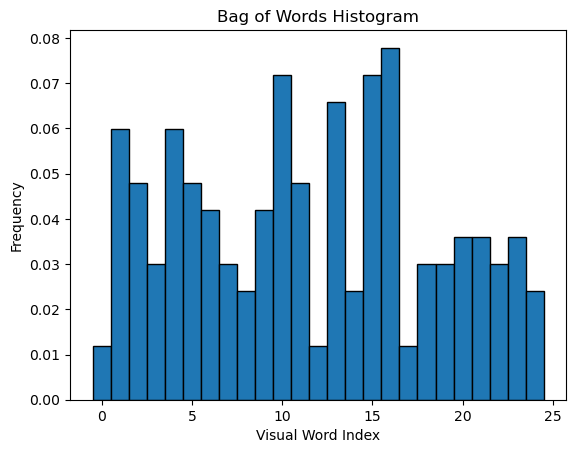

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

def bag_of_words_single_image(descriptors, k):
    # Perform K-means clustering on the descriptors
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(descriptors)  # Fit the descriptors to the k-means model

    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_

    # Create histogram of visual words
    hist, _ = np.histogram(labels, bins=np.arange(k+1), density=True)

    return hist, cluster_centers

def visualize_bow_histogram(hist, k):
    plt.bar(np.arange(k), hist, width=1, edgecolor="black", align="center")
    plt.title("Bag of Words Histogram")
    plt.xlabel("Visual Word Index")
    plt.ylabel("Frequency")
    plt.show()

def bow(img_ndarray, k=25):

    hist, cluster_centers = bag_of_words_single_image(descriptors, k)

    visualize_bow_histogram(hist, k)

    return hist, cluster_centers

hist, cluster_centers = bow(img_ndarray, k=25)  


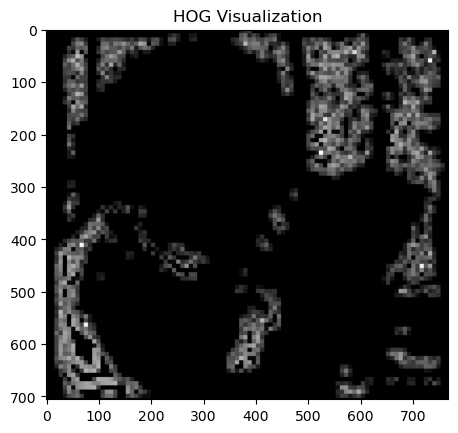

In [ ]:
def resize_image_to_cell_size(img_ndarray, cell_size=(8, 8)):
    height, width = img_ndarray.shape

    # Compute the new dimensions that are divisible by the cell size
    new_height = (height // cell_size[0]) * cell_size[0]
    new_width = (width // cell_size[1]) * cell_size[1]

    # Resize the image by trimming the extra pixels
    resized_img = img_ndarray[:new_height, :new_width]
    return resized_img

def compute_gradients(img_ndarray):
    G_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])  
    G_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])  

    grad_x = conv(img_ndarray, G_x)
    grad_y = conv(img_ndarray, G_y)

    return grad_x, grad_y


def compute_histogram_of_gradients(grad_x, grad_y, cell_size=(8, 8), num_bins=9):
    height, width = grad_x.shape
    cell_histograms = []

    for i in range(0, height, cell_size[0]):
        for j in range(0, width, cell_size[1]):
            cell_grad_x = grad_x[i:i+cell_size[0], j:j+cell_size[1]]
            cell_grad_y = grad_y[i:i+cell_size[0], j:j+cell_size[1]]

            magnitude = np.sqrt(cell_grad_x**2 + cell_grad_y**2)
            angle = np.arctan2(cell_grad_y, cell_grad_x) * 180 / np.pi

            bin_width = 360 / num_bins
            bin_indices = np.floor((angle + 180) / bin_width).astype(int)

            hist, _ = np.histogram(bin_indices, bins=num_bins, range=(0, num_bins), weights=magnitude)
            cell_histograms.append(hist)

    return np.array(cell_histograms)

def normalize_block(histograms, block_size=(2, 2)):
    """Normalize histograms over a block of cells."""
    height, width, num_bins = histograms.shape
    normalized_histograms = []

    for i in range(height - block_size[0] + 1):
        for j in range(width - block_size[1] + 1):
            block = histograms[i:i+block_size[0], j:j+block_size[1]].reshape(-1)
            norm = np.linalg.norm(block) + 1e-5  # Avoid division by zero
            normalized_histograms.append(block / norm)

    return np.array(normalized_histograms)

def compute_hog(img_ndarray, cell_size=(8, 8), block_size=(2, 2), num_bins=9):
    """Compute the full HOG descriptor for the image."""
    if len(img_ndarray.shape) == 3:
        img_ndarray = np.mean(img_ndarray, axis=2).astype(np.uint8)

    img_ndarray = resize_image_to_cell_size(img_ndarray, cell_size)  # Resize the image to fit cell size

    grad_x, grad_y = compute_gradients(img_ndarray)

    cell_histograms = compute_histogram_of_gradients(grad_x, grad_y, cell_size, num_bins)

    height, width = img_ndarray.shape
    cells_per_row = width // cell_size[1]
    cells_per_col = height // cell_size[0]

    cell_histograms = cell_histograms.reshape(cells_per_col, cells_per_row, num_bins)

    hog_features = normalize_block(cell_histograms, block_size)

    hog_descriptor = hog_features.flatten()

    return hog_descriptor, cells_per_col, cells_per_row

def visualize_hog(hog_descriptor, img_shape, cell_size=(8, 8), block_size=(2, 2), num_bins=9):
    """Visualize the HOG features."""
    height, width = img_shape
    cells_per_row = width // cell_size[1]
    cells_per_col = height // cell_size[0]
    
    # Compute the expected number of blocks
    blocks_per_row = cells_per_row - block_size[1] + 1
    blocks_per_col = cells_per_col - block_size[0] + 1
    
    block_histograms = hog_descriptor.reshape(blocks_per_col, blocks_per_row, block_size[0] * block_size[1] * num_bins)

    hog_image = np.zeros((height, width))
    for i in range(block_histograms.shape[0]):
        for j in range(block_histograms.shape[1]):
            block = block_histograms[i, j].reshape(block_size[0], block_size[1], num_bins)
            for k in range(block_size[0]):
                for l in range(block_size[1]):
                    x = (i + k) * cell_size[0]
                    y = (j + l) * cell_size[1]
                    magnitude = np.max(block[k, l])  # Visualize the strongest gradient
                    hog_image[x:x+cell_size[0], y:y+cell_size[1]] += magnitude

    plt.imshow(hog_image, cmap='gray')
    plt.title("HOG Visualization")
    plt.show()


hog_descriptor, cells_per_col, cells_per_row = compute_hog(img_ndarray, cell_size=(8, 8), block_size=(2, 2), num_bins=9)

visualize_hog(hog_descriptor, img_ndarray.shape, cell_size=(8, 8), block_size=(2, 2), num_bins=9)
